In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", sep = ';', header=0, low_memory=False,na_values = '?')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [4]:
#convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime
df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)
df.set_index('Date', inplace = True)

In [7]:
#Convert object types to float

df.Global_active_power = df.Global_active_power.astype(float)
df.Global_reactive_power = df.Global_reactive_power.astype(float)
df.Voltage = df.Voltage.astype(float)
df.Global_intensity = df.Global_intensity.astype(float) 
df.Sub_metering_1 = df.Sub_metering_1.astype(float) 
df.Sub_metering_2 = df.Sub_metering_2.astype(float) 


In [8]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [10]:
#checking missing value
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
#Fill missing values with mean
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [13]:
#check missing values
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0.5, 1.0, 'Upsampled Data by Day')

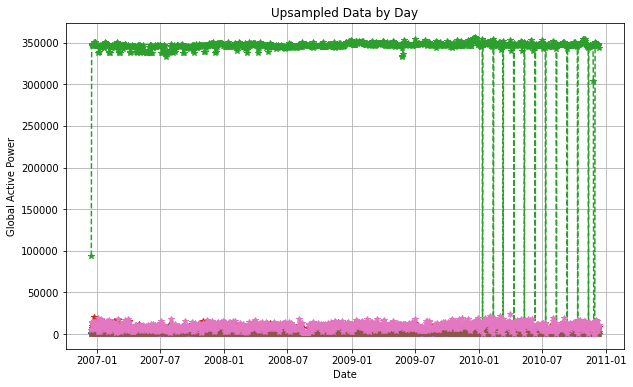

In [14]:
#Resample to daily data points
df_daily = df.resample('D').sum()

plt.figure(figsize=(10,6))
plt.plot(df_daily, '--', marker='*')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Day')

In [15]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


Text(0.5, 1.0, 'Plot of Passengers by Year')

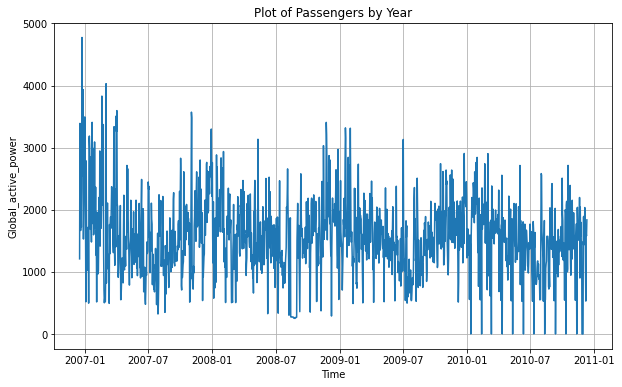

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power )
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.title('Plot of Passengers by Year')

In [17]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.127


In [19]:
# Time Series Specific Exploratory Methods

In [20]:
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


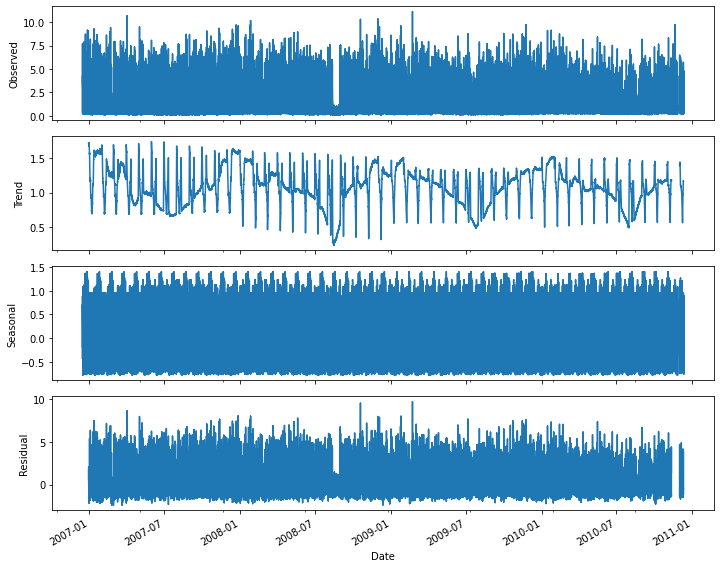

In [21]:
rcParams['figure.figsize'] = 10, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [22]:
#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -9.609344713081752
p-value: 1.829472396561006e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
   1%: -3.4348709954268384
   5%: -2.863536715724964
   10%: -2.567833035595811


In [23]:
from fbprophet import Prophet

In [24]:
df_daily_copy = df_daily.reset_index()
df_daily_copy.head(2)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [25]:
#Create a subset of date and Global_active_power
df_daily_copy = df_daily_copy[['Date','Global_active_power']]
df_daily_copy.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [26]:
df_daily_copy = df_daily_copy.rename(columns={"Date": "ds", "Global_active_power": "y"})

In [27]:
df_daily_copy.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [28]:
X = df_daily_copy
y  = df_daily_copy.y

In [29]:
x = int(len(X))
X_train, X_test = X[:365], X[365:]
y_train, y_test = y[:365], y[365:]

In [30]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=20, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,2116.246990,1380.350175,3000.062304,2116.246990,2116.246990,101.053392,101.053392,101.053392,101.053392,101.053392,101.053392,0.0,0.0,0.0,2217.300381
1,2006-12-17,2112.147151,1502.790224,3197.198168,2112.147151,2112.147151,185.710355,185.710355,185.710355,185.710355,185.710355,185.710355,0.0,0.0,0.0,2297.857507
2,2006-12-18,2108.047313,1172.615923,2927.323018,2108.047313,2108.047313,-35.021515,-35.021515,-35.021515,-35.021515,-35.021515,-35.021515,0.0,0.0,0.0,2073.025798
3,2006-12-19,2103.947474,1206.300236,2904.598339,2103.947474,2103.947474,-33.615800,-33.615800,-33.615800,-33.615800,-33.615800,-33.615800,0.0,0.0,0.0,2070.331674
4,2006-12-20,2099.847636,1175.462088,2940.604538,2099.847636,2099.847636,-36.255745,-36.255745,-36.255745,-36.255745,-36.255745,-36.255745,0.0,0.0,0.0,2063.591891
5,2006-12-21,2095.747797,1145.061239,2861.850255,2095.747797,2095.747797,-135.804734,-135.804734,-135.804734,-135.804734,-135.804734,-135.804734,0.0,0.0,0.0,1959.943063
6,2006-12-22,2091.647959,1244.879678,2869.855388,2091.647959,2091.647959,-46.065954,-46.065954,-46.065954,-46.065954,-46.065954,-46.065954,0.0,0.0,0.0,2045.582005
7,2006-12-23,2087.548120,1359.236488,3057.808197,2087.548120,2087.548120,101.053392,101.053392,101.053392,101.053392,101.053392,101.053392,0.0,0.0,0.0,2188.601512
8,2006-12-24,2083.448282,1426.871151,3060.153847,2083.448282,2083.448282,185.710355,185.710355,185.710355,185.710355,185.710355,185.710355,0.0,0.0,0.0,2269.158637
9,2006-12-25,2079.348443,1263.180650,2887.857865,2079.348443,2079.348443,-35.021515,-35.021515,-35.021515,-35.021515,-35.021515,-35.021515,0.0,0.0,0.0,2044.326928


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2217.300381,1380.350175,3000.062304,2116.246990,2116.246990,2116.246990
1,2006-12-17,2297.857507,1502.790224,3197.198168,2112.147151,2112.147151,2112.147151
2,2006-12-18,2073.025798,1172.615923,2927.323018,2108.047313,2108.047313,2108.047313
3,2006-12-19,2070.331674,1206.300236,2904.598339,2103.947474,2103.947474,2103.947474
4,2006-12-20,2063.591891,1175.462088,2940.604538,2099.847636,2099.847636,2099.847636
...,...,...,...,...,...,...,...
380,2007-12-31,1710.760095,827.859159,2611.577644,1745.781609,1742.180176,1749.370288
381,2008-01-01,1714.835617,877.335139,2542.663596,1748.451417,1744.527370,1752.455002
382,2008-01-02,1714.865480,885.247691,2537.977364,1751.121224,1746.781013,1755.615101
383,2008-01-03,1617.986298,798.381661,2516.130188,1753.791032,1749.020028,1758.803232


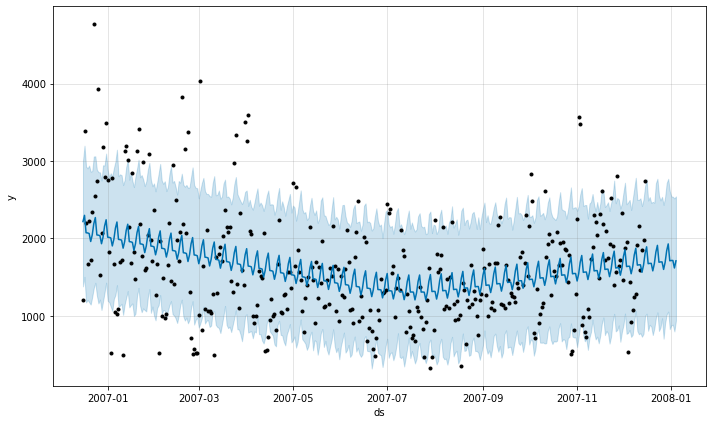

In [33]:
model.plot(forecast)
plt.show()

In [34]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [35]:
actual = y_train
pred = forecast['yhat'][:365]

mape(actual, pred)

41.19224361105977

In [36]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:365]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

659.9002230818794
